﻿
보스턴 주가 예측


Ordinary Least Squares 기반의 회귀 계수 계산(Rss 계산 시 제곱을 사용하는 것을 말하는 듯 하다)의 경우 입력 피처의 독립성에 많은 영향을 받는다. 피쳐간의 상관관계가 높은 경우 분사이 매우 커져서 오류에 매우 민감해진다. 이러한 현상을 다중공선성 문제라고 한다.

일반적으로 상관관계가 높은 피처가 많을 경우, 독립적인 중요 피처만 남기고 제거하거나 규제를 적용합니다.

MAE 오류 절댓값, 음수부호 추가

MSE 오류 제곱, 음수 부호 추가

RMSE MSE값에 게곱근, 음수부호 추가

MSLE MSE 값에 로그(인듯), 음수보호 푸가

R^2 예측 분산/실제 분산 1에 가까울 수록 좋다.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [2]:
boston = load_boston()

In [3]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
df['PRICE'] = boston.target

In [5]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [6]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

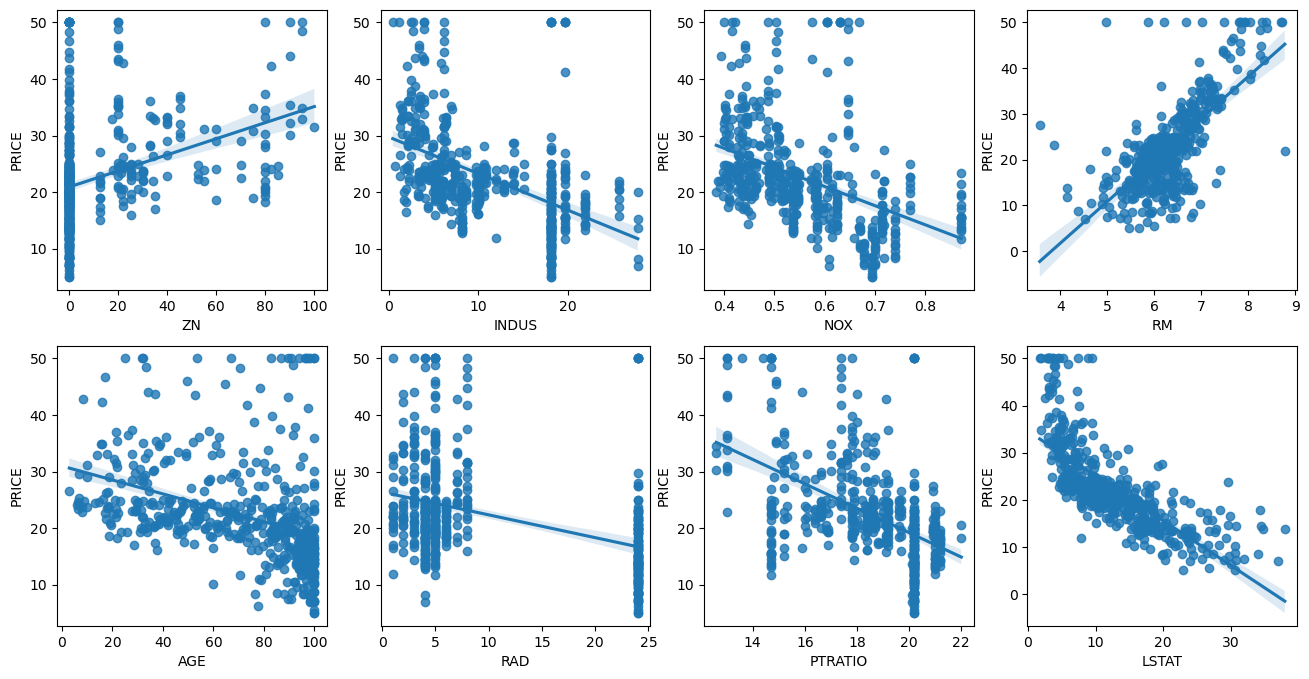

In [7]:
lm_features = [ 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'RAD', 'PTRATIO', 'LSTAT']
fig, axs = plt.subplots(figsize=(16,8),ncols=4, nrows=2)
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data = df, ax = axs[row][col])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [9]:
y = df['PRICE']
X = df.drop(columns=['PRICE'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=156)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
print(f'MSE:{mse}, RMSE:{rmse}, R2:{r2_score(y_test,pred)}')
# 322page

MSE:17.296915907902058, RMSE:4.158956107955704, R2:0.7572263323138935


In [10]:
pred = lr.predict(X_test)

In [11]:
lr.coef_

array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
       -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
        3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
       -5.66182106e-01])

In [12]:
lr.intercept_

40.99559517216412

In [13]:
np.round(lr.coef_,1)

array([ -0.1,   0.1,   0. ,   3. , -19.8,   3.4,   0. ,  -1.7,   0.4,
        -0. ,  -0.9,   0. ,  -0.6])

In [14]:
pd.Series(np.round(lr.coef_,1),index=X.columns).sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [40]:
neg_mse_scores = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

In [41]:
neg_mse_scores

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [42]:
np.mean(np.sqrt(neg_mse_scores*-1))

5.8286589462158345

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [20]:
ridge = Ridge(alpha=10)
neg_mse_score = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error', cv=5)

In [32]:
np.mean(np.sqrt(neg_mse_scores*-1))

5.329589628472148

In [22]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge,X,y,scoring='neg_mean_squared_error',cv=5)
    print(np.mean(np.sqrt(neg_mse_scores * -1)))

5.82865894621581
5.788486627032412
5.6525709656135446
5.518166280868972
5.329589628472148


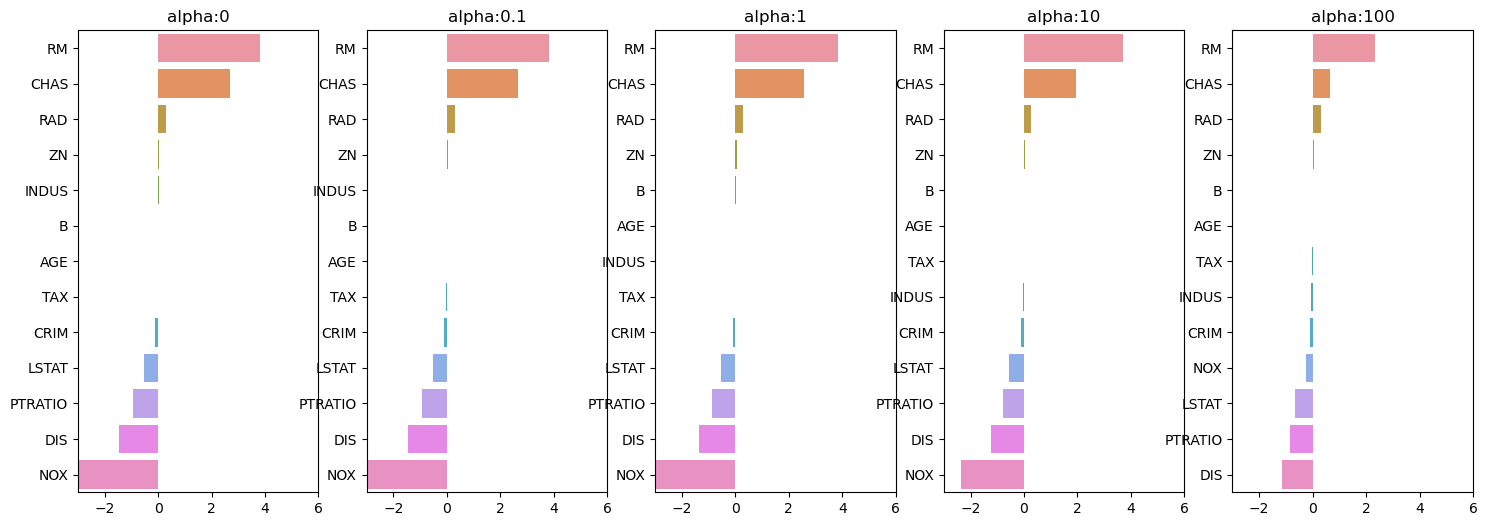

In [23]:
# 규제별 피쳐 회귀계수
fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(ridge.coef_,index=X.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
    # 마지막 nox 값

In [24]:
ridge_alphas=[0,0.1,1,10,100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending = False)


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [25]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
         # param에 따라 모델을 만들어 준다
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        # L1 30% L2 70%
        
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        
        # 받아온 데이터를 평균을 내준다. (오류이므로 큰게 않좋다 -> -1 *)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval


In [26]:
lasso_alphas = [0.05,0.07,0.1,0.5,1,3]
# 라쏘 알파값이 높아질 수 록 계수가 0이 되는 것이 늘어난다.
coeff_lasso_df = get_linear_reg_eval('Lasso',
                                     params=lasso_alphas,
                                     X_data_n=X,
                                     y_target_n=y)

#######  Lasso #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.628 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [27]:
coeff_lasso_df

,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.098935,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
ZN,0.048826,0.049059,0.049211,0.049544,0.049165,0.037231
INDUS,-0.041355,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CHAS,1.761631,1.434343,0.955190,0.000000,0.000000,0.000000
NOX,-1.044929,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
RM,3.836618,3.789725,3.703202,2.498212,0.949811,0.000000
AGE,-0.011858,-0.011706,-0.010037,0.003604,0.020910,0.042495
DIS,-1.202690,-1.176583,-1.160538,-0.936605,-0.668790,-0.000000
RAD,0.271034,0.270936,0.274707,0.277451,0.264206,0.061864
TAX,-0.014028,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602


In [28]:
elastic_alphas = [0.05,0.07,0.1,0.5,1,3]
# 라쏘 알파값이 높아질 수 록 계수가 0이 되는 것이 늘어난다.
coeff_elastic_df = get_linear_reg_eval('ElasticNet',
                                     params=elastic_alphas,
                                     X_data_n=X,
                                     y_target_n=y)

#######  ElasticNet #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.555 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [29]:
coeff_elastic_df

,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
CRIM,-0.099912,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
ZN,0.049631,0.050107,0.050617,0.052878,0.052136,0.038268
INDUS,-0.043435,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CHAS,1.615711,1.330724,0.979706,0.000000,0.000000,0.000000
NOX,-1.023177,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
RM,3.679112,3.574162,3.414154,1.918419,0.938789,0.000000
AGE,-0.010750,-0.010116,-0.008276,0.007760,0.020348,0.043446
DIS,-1.210164,-1.189438,-1.173647,-0.975902,-0.725174,-0.031208
RAD,0.277089,0.278880,0.283443,0.300761,0.289299,0.146846
TAX,-0.014245,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417


In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [31]:
alphas=[0.1,1,10,100]
scale_methods=[(None,None),
               ('Standard',None),
               ('Standard',2),
               ('MinMax',None),
               ('MinMax',2),
               ('Log',None)]
for scale_method in scale_methods:
    X_scaled_data = get_scaled_data(method = scale_method[0],p_degree=scale_method[1],input_data=X)
    print(f'{scale_method[0]} {scale_method[1]}')
    get_linear_reg_eval('Ridge',
                       params=elastic_alphas,
                       X_data_n=X_scaled_data,
                       y_target_n=y,
                       return_coeff = False)

None None
#######  Ridge #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.807 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589 
Standard None
#######  Ridge #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.827 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.827 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.816 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.757 
Standard 2
#######  Ridge #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 9.150 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 9.011 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 7.507 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.163 
MinMax None
#######  Ridge #######
alpha 0.05일 때 5 폴드 세트의 평균 RMSE: 5.795 
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.782 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.585 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 